<table style="border: none" align="left">
   <tr style="border: none">
      <th style="border: none" align="center"><font face="verdana" size="5" color="black"><b>How to evaluate a regression model (Boston house prices prediction model)</b></th>
      <th style="border: none"><img src="https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true" alt="Watson Machine Learning icon" height="40" width="40"></th>
   </tr>
   <tr style="border: none">
       <th style="border: none"><img src="https://github.com/pmservice/wml-sample-models/raw/master/scikit-learn/boston/images/boston_houseprice_banner.png" width="1000" alt="Icon"> </th>
   </tr>
</table>

This notebook demonstates how to obtain data, build predictive models, score models, and evaluate models. Especially, this notebook focuses more on `evaluating regression` models with various `metrics`.

You will use a publicly available data set, **Boston house prices data set** which is included in scikit-learn, to predict house prices.

The notebook uses `scikit-learn 0.20`, `xgboost 0.82`,  and `watson-machine-learning-client`.

Some familiarity with Python is helpful. This notebook runs on Python 3.6.

## Contents

1.	[Load and explore data](#load)
2.	[Build the model](#model)
3.	[Persist the model](#persistence)
4.	[Deploy and score the model in the Watson Machine Learning (WML) repository](#scoring)
5.  [Download the model from the Watson Machine Learning (WML) repository](#download)
6.  [Model evaluation](#eval)
7.	[Summary and next steps](#summary)

<a id="load"></a>
## 1. Load and explore data

The sample data set contains boston house prices. The data set can be found <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/" target="_blank" rel="noopener no referrer">here</a>.

In this section, you will learn how to:
- [1.1 Explore Data](#dataset)  
- [1.2 Check the correlations between predictors and the target](#corr)

### 1.1 Explore data<a id="dataset"></a>

In this subsection, you will perform exploratory data analysis of the boston house prices data set.

In [2]:
from sklearn import datasets
from pandas import DataFrame

boston_data = datasets.load_boston()

Let's check the names of the predictors.

In [3]:
print(boston_data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**Tip:** Run `print(boston_data.DESCR)` to view a detailed description of the data set.

In [4]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Create a pandas DataFrame and display some descriptive statistics.

In [5]:
boston_df = DataFrame(boston_data.data)
boston_df.columns = boston_data.feature_names
boston_df['PRICE'] = boston_data.target

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The describe method generates summary statistics of numerical predictors.

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1.2 Check the correlations between predictors and the target <a id="corr"></a>

In this subsection, you will check the linear correlations between predictors and target by plotting a scatterplot matrix and a heatmap. You need the following packages in order to plot the scatterplot matrix and the heatmap:
* ``matplotlib``
* ``seaborn``

Pearson-type correlations - linear correlations - are excessively affected by outliers, unequal predictors, non-normality, and non-linearities. Hence, when plotting the correlation matrix, it is better to plot the scatterplot matrix first to check the outliers and then plot the heatmap of the correlation matrix.

In [85]:
from matplotlib.pyplot import subplots
from seaborn import heatmap, set

In [86]:
set(style='ticks')

Plot the heatmap of correlation matrix.

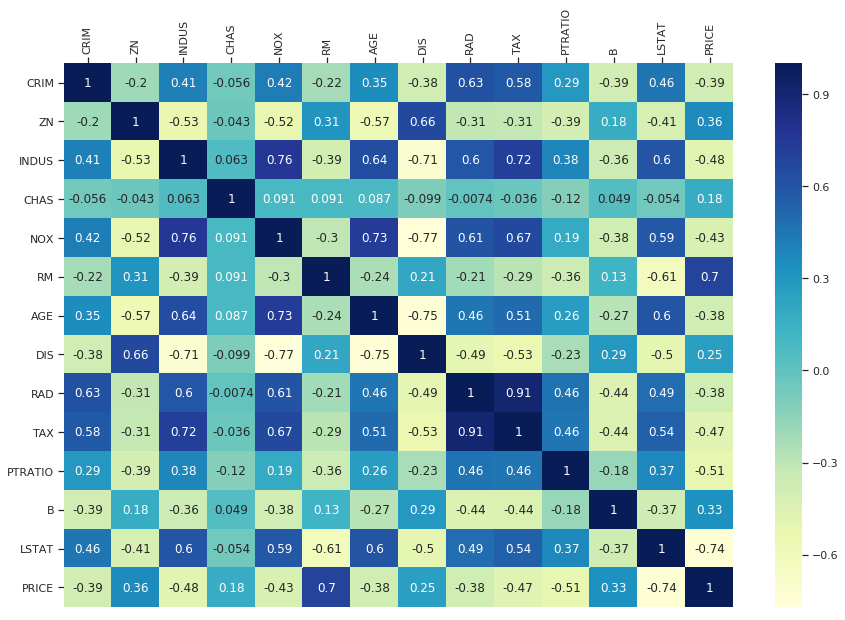

In [87]:
subplots(figsize=(15,10))
hm = heatmap(boston_df.corr(), annot=True, cmap='YlGnBu')
hm.set_xticklabels(hm.get_xticklabels(), rotation=90)
hm.xaxis.set_ticks_position('top')

From both plots, you can see that the predictor ``RM`` has strong correlation with the target ``PRICE``.

<a id="model"></a>
## 2. Build models

In this section, you will learn how to:
- [2.1 Split data](#prep)
- [2.2 Build pipelines](#pipe)
- [2.3 Train models](#train)

### 2.1 Split data<a id="prep"></a>

In this subsection, you will split the data set into: 
- Training set
- Testing set

In [12]:
# Split the data into two data sets.
from sklearn.model_selection import train_test_split

X = boston_df.drop('PRICE', axis=1)
y = boston_df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)

print('Number of training records: {}'.format(X_train.shape[0]))
print('Number of testing records: {}'.format(X_test.shape[0]))

Number of training records: 404
Number of testing records: 102


Your data has been successfully split into two data sets: 

-  The training set, which is the largest group, will be used for training.
-  The testing set will be used for model evaluation and testing the model.

### 2.2 Build pipelines<a id="pipe"></a>

In this subsection, you will create a scikit-learn pipeline. Although it is **`not`** recommended to use `grid search` if the `data set` is small, it will be used in this subsection in order to present `hyperparameter tuning`.

<div class="alert-block alert-info"><br>&nbsp;&nbsp;&nbsp;&nbsp;Grid search is used for this model as an example, but it is <b>not</b> recommended for small data sets such as this one, as it might lead to overfitting.<br><br></div>

The following models will be used for prediction:
- Elastic Network (A linear regression model trained with both l1 and l2 norm regularization)
- Gradient Boosting Regression
- XGBoost Regression

The following text preprocessing method will be used:
- Standard Scaling

Import required modules to build the pipeline.

In [50]:
from numpy import arange
from pprint import pprint
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from time import time
from warnings import filterwarnings
from xgboost.sklearn import XGBRegressor
filterwarnings('ignore')

Standardize the features by removing the mean and scaling to unit variance.

In [43]:
scaler = StandardScaler()

Build a pipeline that has `StandardScaler` and `ElasticNet`.

In [44]:
pipeline_en = Pipeline([('scaler', scaler), ('reg', ElasticNet())])

Define sets of hyperparameters for grid search in order to obtain the best performing model.

In [45]:
params_en = {
    'reg__max_iter': [1, 5, 10],
    'reg__alpha': [.0001, .001, .01, .1, 1, 10, 100],
    'reg__l1_ratio': arange(.0, 1., .1)
}

Build a pipeline that has `StandardScaler` and `GradientBoostingRegressor`.

In [24]:
pipeline_gbr = Pipeline([('scaler', scaler),
                         ('reg', GradientBoostingRegressor())])

Define sets of hyperparameters for grid search in order to obtain the best performing model.

In [26]:
params_gbr = {
    'reg__n_estimators': [100], 
    'reg__learning_rate': [.01, .02, .05, .1],
    'reg__max_depth': [4, 6],
    'reg__min_samples_leaf': [3, 5, 9, 17],
    'reg__max_features': [.1, .3, 1.]
}

Build a pipeline that has `StandardScaler` and `XGBRegressor`.

In [27]:
pipeline_xgb = Pipeline([('scaler', scaler), ('reg', XGBRegressor())])

Define sets of hyperparameters for grid search in order to obtain the best performing model.

In [28]:
params_xgb = {
    'reg__objective': ['reg:linear'],
    'reg__n_estimators': [100],
    'reg__learning_rate': [.03, 0.05, .07],
    'reg__max_depth': [5, 6, 7],
    'reg__min_child_weight': [4],
    'reg__subsample': [.8],
    'reg__colsample_bytree': [.8],
}

Put all pipelines in a list and hyperparameters for each pipeline in a separate list. 

In [46]:
pipeline_list = [pipeline_en, pipeline_gbr, pipeline_xgb]
params_list = [params_en, params_gbr, params_xgb]

### 2.3 Train models<a id="train"></a>

Train models with hyperparameter tuning on.

In [51]:
model_list = []

for i in range(len(pipeline_list)):
    gs_ts = time()
    grid_search = GridSearchCV(pipeline_list[i],
                               params_list[i],
                               n_jobs=-1,
                               cv=3,
                               verbose=1)
    print('Performing grid search...')
    print('pipeline: {}'.format([name for name, _ in pipeline_list[i].steps]))
    print('parameters:')
    pprint(params_list[i])
    grid_search.fit(X_train, y_train)
    gs_te = time()
    model_list.append(grid_search)
    print('Time elapsed: {:.2f} min\n\n'.format((gs_te - gs_ts) / 60))

Performing grid search...
pipeline: ['scaler', 'reg']
parameters:
{'reg__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'reg__l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'reg__max_iter': [1, 5, 10]}
Fitting 3 folds for each of 210 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Time elapsed: 0.04 min


Performing grid search...
pipeline: ['scaler', 'reg']
parameters:
{'reg__learning_rate': [0.01, 0.02, 0.05, 0.1],
 'reg__max_depth': [4, 6],
 'reg__max_features': [0.1, 0.3, 1.0],
 'reg__min_samples_leaf': [3, 5, 9, 17],
 'reg__n_estimators': [100]}
Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Time elapsed: 0.13 min


Performing grid search...
pipeline: ['scaler', 'reg']
parameters:
{'reg__colsample_bytree': [0.8],
 'reg__learning_rate': [0.03, 0.05, 0.07],
 'reg__max_depth': [5, 6, 7],
 'reg__min_child_weight': [4],
 'reg__n_estimators': [100],
 'reg__objective': ['reg:linear'],
 'reg__subsample': [0.8]}
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Time elapsed: 0.02 min




[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.0s finished


## 3. Persist models <a id="persistence"></a>

In this section, you will learn how to use the `watson-machine-learning-client` package to store your linear models covered in section [2. Build models](#model) in the WML repository.

In [52]:
# Remove current wml package files.
!rm -rf $PIP_BUILD/watson-machine-learning-client

<div class="alert alert-block alert-warning">
    To simply hide the output of pip install, use <tt>-q</tt> after <tt>!pip install</tt>.
</div>

In [53]:
!pip install -q --upgrade pip
!pip install -q --upgrade watson-machine-learning-client

Import the `watson-machine-learning-client` module and authenticate the service instance.

In [54]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

<div class="alert-block alert-info"><br>
    &nbsp;&nbsp;&nbsp;&nbsp;The <tt>watson-machine-learning-client</tt> documentation can be found <a href="https://wml-api-pyclient-dev.mybluemix.net/" target="_blank" rel="noopener no referrer">here</a>.<br><br>
    &nbsp;&nbsp;&nbsp;&nbsp;Documentation on how to obtain your Watson Machine Learning (WML) service instance credentials can be found <a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-get-wml-credentials.html?audience=wdp&linkInPage=true" target="_blank" rel="noopener no referrer">here</a>.<br><br>
</div>

<div class="alert alert-block alert-warning">
    Enter your WML service instance credentials in the following cell.
</div>

In [55]:
wml_credentials = {
    'apikey': '****',
    'iam_apikey_description': '****',
    'iam_apikey_name': '****',
    'iam_role_crn': '****',
    'iam_serviceid_crn': '****',
    'instance_id': '****',
    'password': '****',
    'url': '****',
    'username': '****'
}

In [56]:
# The code was removed by Watson Studio for sharing.

In [57]:
client = WatsonMachineLearningAPIClient(wml_credentials)

### 3.1 Save each model in the Watson Machine Learning (WML) Repository

Save each model artifact like the following cell in your WML instance.

Create the model metadata for each model to store in the repository.

In [62]:
# Model Metadata.
meta_props_en = {
    client.repository.ModelMetaNames.NAME:
    'Best elastic network model for Boston house prices prediction'
}

meta_props_gbr = {
    client.repository.ModelMetaNames.NAME:
    'Best gradient boosting regression model for Boston house prices prediction'
}

meta_props_xgb = {
    client.repository.ModelMetaNames.NAME:
    'Best XGBoost regression model for Boston house prices prediction'
}

meta_props_list = [meta_props_en, meta_props_gbr, meta_props_xgb]

You need the model uid to create the deployment. You can extract the model uid from the saved model details and use it in the next section to create the deployment.

In [64]:
# Create the model artifact.
model_uid_list = []

for i, model in enumerate(model_list):
    model_artifact = client.repository.store_model(model, meta_props_list[i])
    model_uid = client.repository.get_model_uid(model_artifact)
    print('{} model UID = {}'.format(
        model.best_estimator_.named_steps['reg'].__class__.__name__,
        model_uid))
    model_uid_list.append(model_uid)

ElasticNet model UID = 326d4138-87ae-4d07-a0b9-cb239edf13bd
GradientBoostingRegressor model UID = 247c80ff-d86c-4ad8-bb94-18fb130994b9
XGBRegressor model UID = 53b4abac-13b5-4bcb-8e09-bf5e96ea13c0


## 4. Deploy the model to the Watson Machine Learning (WML) repository <a id="scoring"></a>

In this section, you will learn how to create online scoring and score a new data record in the Watson Machine Learning (WML) repository.

You can list all stored models using the  `list_models` method.

### 4.1 Create a model deployment for each model

In [68]:
# Create the deployment.
deployment_details_list = []

for i, model_uid in enumerate(model_uid_list):
    deployment_details = client.deployments.create(
        model_uid, 'Predict Boston house prices with {}'.format(
            model.best_estimator_.named_steps['reg'].__class__.__name__
        )
    )
    deployment_details_list.append(deployment_details)



#######################################################################################

Synchronous deployment creation for uid: '326d4138-87ae-4d07-a0b9-cb239edf13bd' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='bbb5a511-303f-4a54-95ea-12647d785ef4'
------------------------------------------------------------------------------------------------




#######################################################################################

Synchronous deployment creation for uid: '247c80ff-d86c-4ad8-bb94-18fb130994b9' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successful

Obtain the list of all deployments.

All models have been successfully deployed.

In [70]:
# Deployment UID.
for i, deployment_details in enumerate(deployment_details_list):
    deployment_uid = client.deployments.get_uid(deployment_details)
    print(
        'Deployment uid of {} = {}'.format(
            model_list[i].best_estimator_.named_steps['reg'].__class__.__name__,
            deployment_uid
        )
    )

Deployment uid of ElasticNet = bbb5a511-303f-4a54-95ea-12647d785ef4
Deployment uid of GradientBoostingRegressor = 6d67b230-8e75-40f0-a6a7-2212aee28596
Deployment uid of XGBRegressor = 98b4822d-9003-4d42-a767-527a2975b024


## 5. Download the model from the Watson Machine Learning (WML) repository <a id="download"></a>

In this section, you will learn how to download the saved model from the Watson Machine Learning (WML) repository to your local file system.

In [71]:
from os import remove, getcwd, rename
from os.path import exists, join

<div class="alert alert-block alert-warning">
    Enter the desired names of the model files in the <tt>model_file_name_list</tt> list.
</div>

#### Get information about all of the models in the WML repository.

In [72]:
'''
model_file_name_list = [
    'YOUR_MODEL_FILE_NAME_1',
    'YOUR_MODEL_FILE_NAME_2',
    ...
]
'''

model_file_name_list = [
    'en_model.tar.gz', 'gbr_model.tar.gz', 'xgb_model.tar.gz'
]

for i, model_file_name in enumerate(model_file_name_list):
    if exists(model_file_name):
        try:
            remove(model_file_name)
        except:
            print('Error while deleting existing model file - {}'.format(
                model_file_name))

    client.repository.download(model_uid_list[i], model_file_name)

Successfully saved artifact to file: 'en_model.tar.gz'
Successfully saved artifact to file: 'gbr_model.tar.gz'
Successfully saved artifact to file: 'xgb_model.tar.gz'


Decompress each model file which file extension is `tar.gz` and rename the pickled model.

In [73]:
import tarfile

path = getcwd()
new_model_path_list = []

for model_file_name in model_file_name_list:
    with tarfile.open(join(path, model_file_name), 'r:gz') as tar:
        tar.extractall()
        new_model_file_name = model_file_name.split('.')[0] + '.pkl'
        new_path = join(path, new_model_file_name)
        rename(join(path, 'scikit_model.pkl'), new_path)
        new_model_path_list.append(new_path)

You can see that all `tar.gz` files have been decompressed and `pickle` files have new names than `scikit_model.pkl`.

In [74]:
!ls

en_model.pkl	 gbr_model.pkl	   xgb_model.pkl
en_model.tar.gz  gbr_model.tar.gz  xgb_model.tar.gz


In [75]:
from sklearn.externals import joblib

ng_model_list = []

for ng_model in new_model_path_list:
    ng_model_list.append(joblib.load(ng_model))

## 6. Model evaluation <a id="eval"></a>

The following are the regression model evaluation metrics that will be covered in this section.
- Explained variance score
- Mean absolute error
- Mean squared error
- Median absolute error
- ${R^2}$ score (coefficient of determination)

<div class="alert-block alert-info"><br>&nbsp;&nbsp;&nbsp;&nbsp;Details of all <tt>scikit-learn</tt> regression metrics above can be found <a href="https://scikit-learn.org/0.20/modules/model_evaluation.html#regression-metrics" target="_blank" rel="noopener no referrer">here</a>.<br><br>
</div>

Import required modules.

In [76]:
from sklearn.metrics import (
    explained_variance_score, mean_absolute_error, mean_squared_error,
    median_absolute_error, r2_score
)

A list that has the name of regressors.

In [78]:
model_name_list = [
    'Elastic Network Regressor  ',
    'Gradient Boosting Regressor',
    'XGBoost Regressor          '
]

Predicted values by each model will be stored in `y_pred_list`.

In [79]:
y_pred_list = []

for ng_model in ng_model_list:
    y_pred_list.append(ng_model.predict(X_test))

Plot the scatter plot of prices vs. predicted prices of each model.

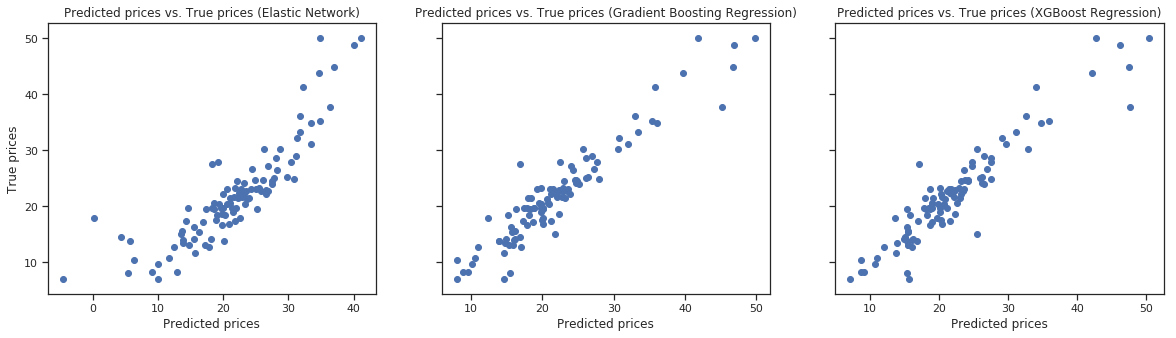

In [88]:
fig, (ax1, ax2, ax3) = subplots(1, 3, figsize=(20, 5), sharey=True)
ax1.scatter(y_pred_list[0], y_test)
ax2.scatter(y_pred_list[1], y_test)
ax3.scatter(y_pred_list[2], y_test)
ax1.set_title('Predicted prices vs. True prices (Elastic Network)')
ax1.set_ylabel('True prices')
ax1.set_xlabel('Predicted prices')
ax2.set_title(
    'Predicted prices vs. True prices (Gradient Boosting Regression)')
ax2.set_xlabel('Predicted prices')
ax3.set_title('Predicted prices vs. True prices (XGBoost Regression)')
ax3.set_xlabel('Predicted prices')

### 6.1 Explained variance score

`Explained variance score` is defined as follows:

${explained\_variance(y, \hat{y}) = 1 - \frac{Var\{y - \hat{y}\}}{Var\{y\}}}$

where ${y}$ is the true target output, ${\hat{y}}$ is the predicted target output, and ${Var}$ is the variance.

The best possible score is `1.0`, lower values are worse.

In [90]:
for i, y_pred in enumerate(y_pred_list):
    print(
        'Explained variance score of {}: {}'.format(
            model_name_list[i], explained_variance_score(y_test, y_pred)
        )
    )

Explained variance score of Elastic Network Regressor  : 0.7500884408280344
Explained variance score of Gradient Boosting Regressor: 0.8994665709436588
Explained variance score of XGBoost Regressor          : 0.8841375930828855


### 6.2 Mean absolute error

`Mean absolute error` is a risk metric corresponding to the expected value of the absolute error loss or ${l1}$-norm loss.

`Mean absolute error` is defined as follows:

${MAE(y, \hat{y}) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}}|y_{i} - \hat{y_{i}}|}$

where ${y_i}$ is the true value of the ${i}$-th sample,  ${\hat{y_{i}}}$ is the predicteds value of the ${i}$-th sample, and ${n_{samples}}$ is the total number of samples.

In [91]:
for i, y_pred in enumerate(y_pred_list):
    print(
        'Mean absolute error (MAE) of {}: {}'.format(
            model_name_list[i], mean_absolute_error(y_test, y_pred)
        )
    )

Mean absolute error (MAE) of Elastic Network Regressor  : 3.0813996913310966
Mean absolute error (MAE) of Gradient Boosting Regressor: 1.9377594146009482
Mean absolute error (MAE) of XGBoost Regressor          : 2.101449839274088


### 6.3 Mean squared error

`Mean squared error` is a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

`Mean squared error` is defined as follows:

${MSE(y, \hat{y}) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}}(y_{i} - \hat{y_{i}})^{2}}$

where ${y_i}$ is the true value of the ${i}$-th sample,  ${\hat{y_{i}}}$ is the predicteds value of the ${i}$-th sample, and ${n_{samples}}$ is the total number of samples.

In [93]:
for i, y_pred in enumerate(y_pred_list):
    print(
        'Mean squared error (MSE) of {}: {}'.format(
            model_name_list[i], mean_squared_error(y_test, y_pred)
        )
    )

Mean squared error (MSE) of Elastic Network Regressor  : 19.734495755390057
Mean squared error (MSE) of Gradient Boosting Regressor: 7.875860163863192
Mean squared error (MSE) of XGBoost Regressor          : 9.071316205451586


### 6.4 Median absolute error

The loss of `median absolute error` is calculated by taking the median of all absolute differences between the target and the prediction.

`Median absolute error` is defined as follows:

${MedAE(y, \hat{y}) = median(|y_{1} - \hat{y_{1}}|, .., |y_{n} - \hat{y_{n}}|)}$ 

where ${y_i}$ is the true value of the ${i}$-th sample and  ${\hat{y_{i}}}$ is the predicteds value of the ${i}$-th sample.

In [95]:
for i, y_pred in enumerate(y_pred_list):
    print(
        'Median absolute error (MedAE) of {}: {}'.format(
            model_name_list[i], median_absolute_error(y_test, y_pred)
        )
    )

Median absolute error (MedAE) of Elastic Network Regressor  : 2.1155211574967208
Median absolute error (MedAE) of Gradient Boosting Regressor: 1.2333302459047326
Median absolute error (MedAE) of XGBoost Regressor          : 1.555121040344238


### 6.5 ${R^2}$ score (coefficient of determination)

${R^2}$ score is the percentage of the `target` variation explained by the `linear` model.

${R^2}$ score is defined as follows:


${R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n_{samples}}(y_{i} - \hat{y_{i}})^{2}}{\sum_{i=1}^{n_{samples}}(y_{i} - \overset{\_}{y_{i}})^{2}}}$

where ${y_i}$ is the true value of the ${i}$-th sample, ${\hat{y_{i}}}$ is the predicteds value of the ${i}$-th sample, and ${\overset{\_}{y_{i}} = \frac{1}{n_{samples}}\sum_{i=1}^{n_{samples}}y_{i}}$.

The range of ${R^2}$ score is between 0.0 and 1.0. 

- ${R^2 = 0.0}$ means the model explains none of the variability of the target data around its mean.
- ${R^2 = 1.0}$ means the model explains all the variability of the target data around its mean.

In [100]:
for i, y_pred in enumerate(y_pred_list):
    print(
        'R-squared score of {}: {}'.format(
            model_name_list[i], r2_score(y_test, y_pred)
        )
    )

R-squared score of Elastic Network Regressor  : 0.7479432798254992
R-squared score of Gradient Boosting Regressor: 0.8994064248682839
R-squared score of XGBoost Regressor          : 0.8841375914159135


<a id="summary"></a>
## 7. Summary and next steps     

You have successfully completed this notebook! 

You learned how to build a `regression model` and save it in the Watson Machine Learning (WML) repository.

You also learned how to score the aforesaid `regression model` and evaluate it with various `metrics`.

### Resources <a id="resources"></a>

To learn more about configurations used in this notebook or more sample notebooks, tutorials, documentation, how-tos, and blog posts, check out these links:

<div class="alert alert-block alert-success">

<h4>IBM documentation</h4>
<ul>
 <li> <a href="https://wml-api-pyclient-dev.mybluemix.net" target="_blank" rel="noopener no referrer">watson-machine-learning</a></li> 
</ul>
    
<h4> IBM Samples</h4>
<ul>
 <li> <a href="https://dataplatform.cloud.ibm.com/gallery" target="_blank" rel="noopener noreferrer">Sample notebooks</a></li>
</ul>
 
<h4> Others</h4>
<ul>
 <li> <a href="https://www.python.org" target="_blank" rel="noopener noreferrer">Official Python website</a></li>
 <li> <a href="https://matplotlib.org" target="_blank" rel="noopener noreferrer">Matplotlib: Python plotting</a></li>
 <li> <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html" target="_blank" rel="noopener noreferrer">Pandas DataFrame</a></li>
 <li> <a href="https://scikit-learn.org/0.20/modules/model_evaluation.html" target="_blank" rel="noopener no referrer">Scikit-learn 0.20: Model evaluation: quantifying the quality of predictions</a>
 <li> <a href="https://seaborn.pydata.org" target="_blank" rel="noopener noreferrer">Seaborn</a></li>
</ul>
 </div>

### Author

**Jihyoung Kim**, Ph.D., is a Data Scientist at IBM who contributes to Watson Studio in order to democratize data science.  

Copyright © 2017-2020 IBM. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>